In [25]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
import h5py
from matplotlib import pyplot as plt
%matplotlib inline


In [26]:
pd1 = pd.read_csv('dataset.csv')

In [27]:
pd2 = pd1.head(19)

In [28]:
pd2

,Expt.No,Electrolyte,Voltage,Feed Rate,Duty cycle,MRR,Circularity,Conicity,Overcut
0,1,NaCl,6,0.5,0.6,0.000260,0.008,1.000,0.6630
1,2,NaCl,6,0.6,0.7,0.000340,0.003,0.375,0.7905
2,3,NaCl,6,0.7,0.8,0.000407,0.016,2.000,0.7180
3,4,NaCl,7,0.5,0.7,0.000370,0.006,0.750,0.6950
4,5,NaCl,7,0.6,0.8,0.000430,0.008,1.000,0.8250
5,6,NaCl,7,0.7,0.6,0.000260,0.011,1.375,0.7205
6,7,NaCl,8,0.5,0.8,0.000390,0.019,2.375,0.8265
7,8,NaCl,8,0.6,0.6,0.000250,0.007,0.875,0.6445
8,9,NaCl,8,0.7,0.7,0.000370,0.001,0.125,0.9045
9,10,NaCl,6,0.5,0.6,0.000230,0.006,0.950,0.6530


In [51]:
X = pd2[['Voltage', 'Feed Rate ', 'Duty cycle', 'MRR']]
y = pd2['Overcut']

In [52]:
pd2.columns

Index(['Expt.No', 'Electrolyte', 'Voltage', 'Feed Rate ', 'Duty cycle', 'MRR',
       'Circularity', 'Conicity', 'Overcut'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression()

In [58]:
print(lm.intercept_)

0.48930651005674153


In [59]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Voltage,0.031481
Feed Rate,-0.049851
Duty cycle,-0.438901
MRR,1190.777752


In [60]:
predictions = lm.predict(X_test)

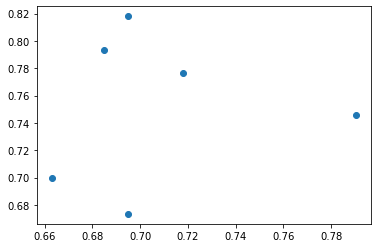

In [61]:
plt.scatter(y_test,predictions)

In [62]:
from sklearn import metrics

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0654773205129583
MSE: 0.005686247046395969
RMSE: 0.07540720818592854
